In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv('/content/dados.csv')
avaliacoes = pd.read_csv('/content/avaliacoes.csv')

In [ ]:
dados.head(2) #printa em forma de tabela os primeiros 10 registros

,product_id,product_name,category,category_geral,subcategoria,actual_price,product_price,percent,actual_price_real,rating,rating_count,about_product,product_link,title,review,titulo_ptbr,review_ptbr,resumo,sentimentos
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,"₹399,00","₹1.099,00","63,69%","R$ 23,86","4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"Satisfeito, o carregamento é realmente rápido,...",Parece durável. O carregamento também está bom...,"Pessoas estão satisfeitas com a durabilidade, ...",positivo
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,"₹199,00","₹349,00","42,98%","R$ 11,90",4,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,NaN,NaN,NaN,NaN


In [ ]:
# Obtenha informações sobre as colunas e tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_id         1465 non-null   object
 1   product_name       1465 non-null   object
 2   category           1465 non-null   object
 3   category_geral     1465 non-null   object
 4   subcategoria       1465 non-null   object
 5   actual_price       1465 non-null   object
 6   product_price      1465 non-null   object
 7   percent            1465 non-null   object
 8   actual_price_real  1465 non-null   object
 9   rating             1465 non-null   object
 10  rating_count       1465 non-null   int64 
 11  about_product      1465 non-null   object
 12  product_link       1465 non-null   object
 13  title              1465 non-null   object
 14  review             1465 non-null   object
 15  titulo_ptbr        1 non-null      object
 16  review_ptbr        1 non-null      object


In [ ]:
# Estatísticas descritivas das colunas numéricas
dados.describe()

,rating_count
count,1.465000e+03
mean,2.166947e+04
std,9.132905e+04
min,0.000000e+00
25%,9.100000e+02
50%,4.003000e+03
75%,1.466700e+04
max,2.051952e+06


In [ ]:
# Remova o símbolo da moeda da coluna "actual_price" (supondo que o símbolo da rupia seja "₹")
dados['actual_price'] = dados['actual_price'].str.replace('₹', '')

In [ ]:
dados['actual_price'] = dados['actual_price'].str.replace('.', '')

<ipython-input-10-37c001c2b248>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['actual_price'] = dados['actual_price'].str.replace('.', '')


In [ ]:
dados['actual_price'] = dados['actual_price'].str.replace(',', '.')

In [ ]:
# Converta a coluna para o tipo de dados desejado (provavelmente numérico)
dados['actual_price'] = pd.to_numeric(dados['actual_price'])

# Exibindo os primeiros registros após a remoçào do símbolo da moeda
dados.head()

,product_id,product_name,category,category_geral,subcategoria,actual_price,product_price,percent,actual_price_real,rating,rating_count,about_product,product_link,title,review,titulo_ptbr,review_ptbr,resumo,sentimentos
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,399.0,"₹1.099,00","63,69%","R$ 23,86","4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"Satisfeito, o carregamento é realmente rápido,...",Parece durável. O carregamento também está bom...,"Pessoas estão satisfeitas com a durabilidade, ...",positivo
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,199.0,"₹349,00","42,98%","R$ 11,90",4,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,NaN,NaN,NaN,NaN
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,199.0,"₹1.899,00","89,52%","R$ 11,90","4,52",7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",NaN,NaN,NaN,NaN
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,329.0,"₹699,00","52,93%","R$ 19,67","4,5",94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",NaN,NaN,NaN,NaN
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,154.0,"₹399,00","61,40%","R$ 9,21","4,5",16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",NaN,NaN,NaN,NaN


In [ ]:
# Remova o símbolo da moeda da coluna "product_price" (supondo que o símbolo da rupia seja "₹")
dados['product_price'] = dados['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')

# Converta a coluna "product_price" para o tipo de dados desejado (provavelmente numérico)
dados['product_price'] = pd.to_numeric(dados['product_price'])
dados.head()

<ipython-input-15-beb308d2417d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['product_price'] = dados['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')


,product_id,product_name,category,category_geral,subcategoria,actual_price,product_price,percent,actual_price_real,rating,rating_count,about_product,product_link,title,review,titulo_ptbr,review_ptbr,resumo,sentimentos
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,399.0,1099.0,"63,69%","R$ 23,86","4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"Satisfeito, o carregamento é realmente rápido,...",Parece durável. O carregamento também está bom...,"Pessoas estão satisfeitas com a durabilidade, ...",positivo
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,199.0,349.0,"42,98%","R$ 11,90",4,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,NaN,NaN,NaN,NaN
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,199.0,1899.0,"89,52%","R$ 11,90","4,52",7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",NaN,NaN,NaN,NaN
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,329.0,699.0,"52,93%","R$ 19,67","4,5",94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",NaN,NaN,NaN,NaN
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,154.0,399.0,"61,40%","R$ 9,21","4,5",16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",NaN,NaN,NaN,NaN


In [ ]:
# Remova o símbolo da moeda da coluna "product_price" (supondo que o símbolo da rupia seja "₹")
dados['rating'] = dados['rating'].str.replace(',', '.')

# Converta a coluna "product_price" para o tipo de dados desejado (provavelmente numérico)
dados['rating'] = pd.to_numeric(dados['rating'])
dados.head()

,product_id,product_name,category,category_geral,subcategoria,actual_price,product_price,percent,actual_price_real,rating,rating_count,about_product,product_link,title,review,titulo_ptbr,review_ptbr,resumo,sentimentos
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,399.0,1099.0,"63,69%","R$ 23,86",4.50,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"Satisfeito, o carregamento é realmente rápido,...",Parece durável. O carregamento também está bom...,"Pessoas estão satisfeitas com a durabilidade, ...",positivo
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,199.0,349.0,"42,98%","R$ 11,90",4.00,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,NaN,NaN,NaN,NaN
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,199.0,1899.0,"89,52%","R$ 11,90",4.52,7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",NaN,NaN,NaN,NaN
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,329.0,699.0,"52,93%","R$ 19,67",4.50,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",NaN,NaN,NaN,NaN
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,154.0,399.0,"61,40%","R$ 9,21",4.50,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",NaN,NaN,NaN,NaN


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         1465 non-null   object 
 1   product_name       1465 non-null   object 
 2   category           1465 non-null   object 
 3   category_geral     1465 non-null   object 
 4   subcategoria       1465 non-null   object 
 5   actual_price       1465 non-null   float64
 6   product_price      1465 non-null   float64
 7   percent            1465 non-null   object 
 8   actual_price_real  1465 non-null   object 
 9   rating             1465 non-null   float64
 10  rating_count       1465 non-null   int64  
 11  about_product      1465 non-null   object 
 12  product_link       1465 non-null   object 
 13  title              1465 non-null   object 
 14  review             1465 non-null   object 
 15  titulo_ptbr        1 non-null      object 
 16  review_ptbr        1 non

In [ ]:
dados.describe()

,actual_price,product_price,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1.465000e+03
mean,3077.617693,5365.248840,4.432198,2.166947e+04
std,6860.277463,10743.796284,0.226138,9.132905e+04
min,2.500000,38.000000,0.000000,0.000000e+00
25%,314.000000,800.000000,4.490000,9.100000e+02
50%,799.000000,1645.000000,4.500000,4.003000e+03
75%,1999.000000,4199.000000,4.510000,1.466700e+04
max,77990.000000,139900.000000,5.000000,2.051952e+06


In [ ]:
dados.head()

,product_id,product_name,category,category_geral,subcategoria,actual_price,product_price,percent,actual_price_real,rating,rating_count,about_product,product_link,title,review,titulo_ptbr,review_ptbr,resumo,sentimentos
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,399.0,1099.0,"63,69%","R$ 23,86",4.50,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"Satisfeito, o carregamento é realmente rápido,...",Parece durável. O carregamento também está bom...,"Pessoas estão satisfeitas com a durabilidade, ...",positivo
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,199.0,349.0,"42,98%","R$ 11,90",4.00,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,NaN,NaN,NaN,NaN
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,199.0,1899.0,"89,52%","R$ 11,90",4.52,7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",NaN,NaN,NaN,NaN
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,329.0,699.0,"52,93%","R$ 19,67",4.50,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",NaN,NaN,NaN,NaN
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,Accessories&Peripherals,154.0,399.0,"61,40%","R$ 9,21",4.50,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",NaN,NaN,NaN,NaN


# Gráficos

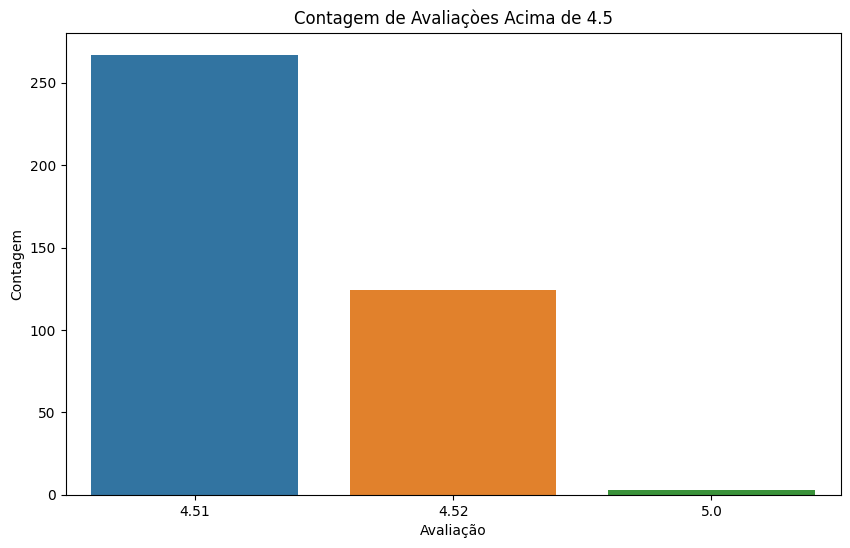

In [ ]:
avaliacoes_acima_de_4_5 = dados[dados['rating'] > 4.5]
contagem_avaliacoes = avaliacoes_acima_de_4_5['rating'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=contagem_avaliacoes.index, y=contagem_avaliacoes.values)
plt.title('Contagem de Avaliaçòes Acima de 4.5')
plt.xlabel('Avaliação')
plt.ylabel('Contagem')
plt.show()

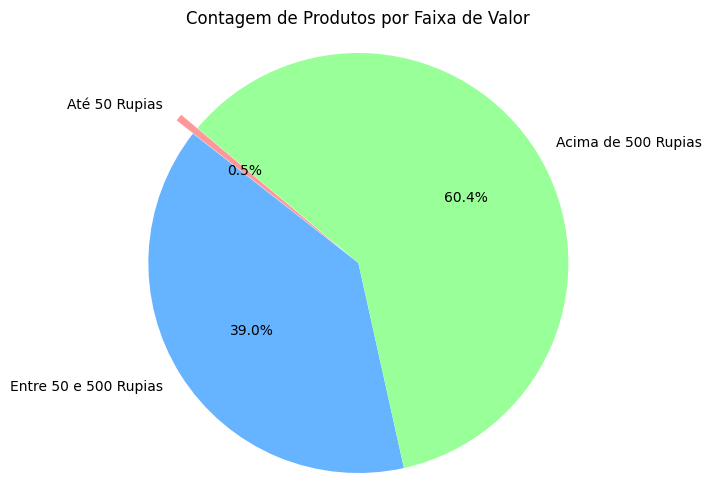

In [ ]:
valores_ate_50 = dados[dados['actual_price'] <= 50]
valores_entre_50_e_500 = dados[(dados['actual_price'] > 50) & (dados['actual_price'] <= 500)]
valores_acima_de_500 = dados[dados['actual_price'] > 500]

# Contagem de produtos em cada faixa de valor
contagem_valores_ate_50 = valores_ate_50.shape[0]
contagem_valores_entre_50_e_500 = valores_entre_50_e_500.shape[0]
contagem_valores_acima_de_500 = valores_acima_de_500.shape[0]

# Criar um gráfico de pizza
labels = ['Até 50 Rupias', 'Entre 50 e 500 Rupias', 'Acima de 500 Rupias']
sizes = [contagem_valores_ate_50, contagem_valores_entre_50_e_500, contagem_valores_acima_de_500]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  # Destacar a primeira fatia (maior valor)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Contagem de Produtos por Faixa de Valor')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()